<a href="https://colab.research.google.com/github/PritamKhan/Data_Analytics/blob/master/Assignment_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Theoretical Question's**
---

**1. What is K-Nearest Neighbors (KNN) and how does it work?**
KNN is a lazy, non-parametric algorithm that makes predictions by finding the K closest training points to a test point using a distance metric (e.g., Euclidean), then classifies or predicts based on those neighbors.

---

**2. What is the difference between KNN Classification and KNN Regression?**

* **Classification**: Assigns the most common class among K neighbors.
* **Regression**: Predicts the average of the target values of K neighbors.

---

**3. What is the role of the distance metric in KNN?**
It determines how "closeness" is measured. Common metrics include **Euclidean**, **Manhattan**, and **Minkowski**. It directly affects the neighbors chosen and model performance.

---

**4. What is the Curse of Dimensionality in KNN?**
As the number of features increases, distance between points becomes less meaningful, making neighbors less reliable and degrading model accuracy.

---

**5. How can we choose the best value of K in KNN?**
Use **cross-validation** to test different K values and choose the one that gives the best performance (e.g., accuracy or RMSE).

---

**6. What are KD Tree and Ball Tree in KNN?**
They are **data structures** used to **speed up neighbor searches**.

* KD Tree: Binary tree based on feature values.
* Ball Tree: Partitions space into hyperspheres.

---

**7. When should you use KD Tree vs. Ball Tree?**

* **KD Tree**: Better for **low-dimensional** data.
* **Ball Tree**: Better for **high-dimensional** or **non-uniform** data.

---

**8. What are the disadvantages of KNN?**

* Slow prediction on large datasets.
* Sensitive to irrelevant or scaled features.
* Struggles with high-dimensional data.
* Doesn’t handle missing values well.

---

**9. How does feature scaling affect KNN?**
Scaling (e.g., Standardization or MinMax) is **crucial**, as KNN relies on distance; features with large values dominate the distance calculation.

---


**10. What is PCA (Principal Component Analysis)?**
PCA is a technique for **reducing dimensionality** by projecting data onto directions (principal components) that capture the **most variance**.

---

**11. How does PCA work?**

* Standardize data.
* Compute covariance matrix.
* Find eigenvectors and eigenvalues.
* Project data onto top principal components.

---

**12. What is the geometric intuition behind PCA?**
PCA rotates the data axes to align with directions of **maximum spread**, capturing the most variation in the fewest components.

---

**13. What are Eigenvalues and Eigenvectors in PCA?**

* **Eigenvectors**: Directions (axes) of maximum variance.
* **Eigenvalues**: Amount of variance captured by each eigenvector.

---

**14. What is the difference between Feature Selection and Feature Extraction?**

* **Feature Selection**: Choose a subset of existing features.
* **Feature Extraction**: Create new features (e.g., PCA components) from the original ones.

---

**15. How do you decide the number of components to keep in PCA?**
Keep components that explain a desired amount of variance (e.g., **95%**), based on the **cumulative explained variance plot**.

---

**16. Can PCA be used for classification?**
Yes, PCA reduces dimensionality **before classification**, improving performance and reducing overfitting, especially with noisy or high-dimensional data.

---

**17. What are the limitations of PCA?**

* Assumes **linear** relationships.
* Doesn’t consider target variable.
* Can lose interpretability.
* Sensitive to scaling and outliers.

---

**18. How do KNN and PCA complement each other?**
Use **PCA to reduce dimensions** before applying KNN. This helps **mitigate the curse of dimensionality**, speeds up KNN, and may improve accuracy.

---

**19. How does KNN handle missing values in a dataset?**
KNN doesn’t handle missing values natively. You must **impute** them first using methods like mean/median/mode or **KNN imputation**.

---

**20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**

* **PCA**: Unsupervised, maximizes variance.
* **LDA**: Supervised, maximizes class separation.
* PCA doesn’t use labels; LDA does.

---





### **Practical Question's**

In [ ]:
#21. Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 275.9503187423206


In [ ]:
#23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X = data.data
y = data.target  # Discrete classes (0, 1, 2)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different distance metrics
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"{metric.capitalize()} Accuracy:", accuracy_score(y_test, y_pred))

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


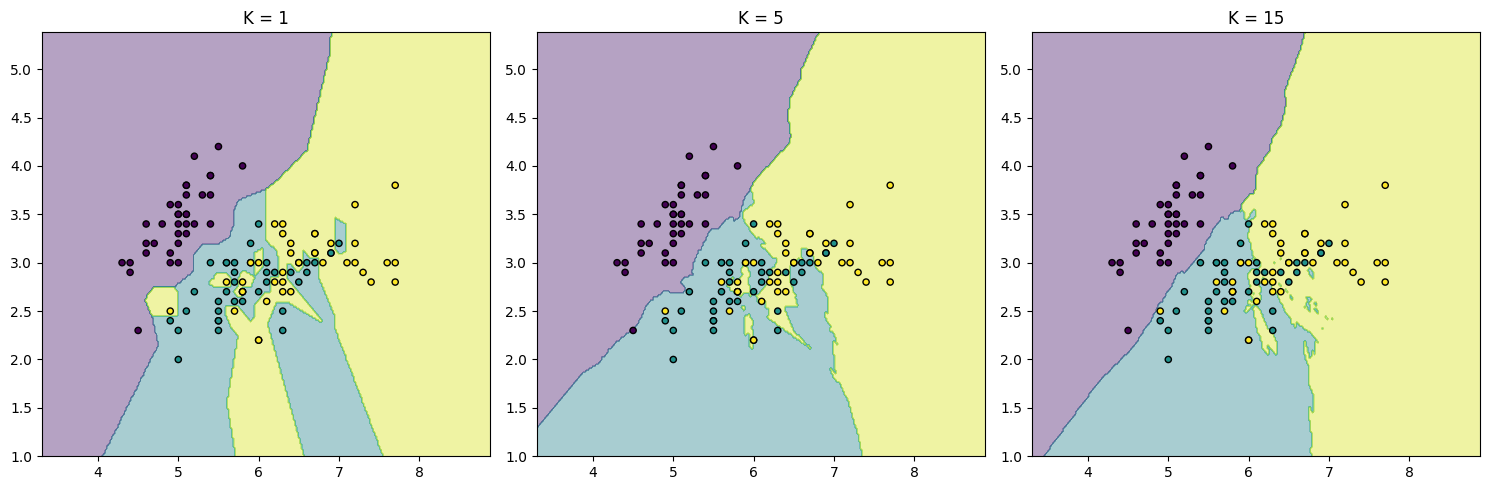

In [ ]:
#24. Train a KNN Classifier with different values of K and visualize decision boundaries

import matplotlib.pyplot as plt
import numpy as np

# Reduce to 2 features for visualization
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize=(15, 5))
for i, k in enumerate([1, 5, 15]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Plotting
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
    plt.title(f"K = {k}")
plt.tight_layout()
plt.show()

In [ ]:
#25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.preprocessing import StandardScaler

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print("Unscaled Accuracy:", acc_unscaled)
print("Scaled Accuracy:", acc_scaled)

Unscaled Accuracy: 0.8157894736842105
Scaled Accuracy: 0.7894736842105263


In [ ]:
#26. Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.decomposition import PCA

X_synthetic, _ = make_regression(n_samples=100, n_features=5, noise=5, random_state=1)
pca = PCA()
pca.fit(X_synthetic)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.28348106 0.22170471 0.18720219 0.16354959 0.14406245]


In [ ]:
#27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("KNN Accuracy without PCA:", acc_scaled)
print("KNN Accuracy with PCA:", acc_pca)

KNN Accuracy without PCA: 0.7894736842105263
KNN Accuracy with PCA: 0.7894736842105263


In [ ]:
#28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best K: {'n_neighbors': 20}
Best CV Score: 0.8047430830039526


In [ ]:
#29. Train a KNN Classifier and check the number of misclassified samples

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
misclassified = (y_pred != y_test).sum()

print("Number of misclassified samples:", misclassified)

Number of misclassified samples: 8


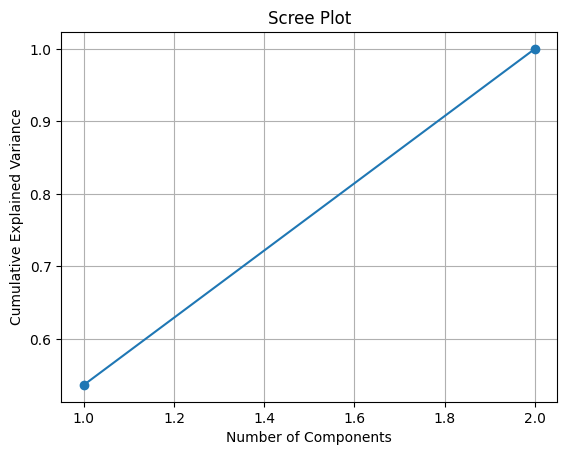

In [ ]:
#30. Train a PCA model and visualize the cumulative explained variance

import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_train_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [ ]:
#31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"{weight.capitalize()} Weights Accuracy:", acc)

Uniform Weights Accuracy: 0.7894736842105263
Distance Weights Accuracy: 0.7894736842105263


In [ ]:
#32. Train a KNN Regressor and analyze the effect of different K values on performance

for k in [1, 3, 5, 10, 20]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, knn_reg.predict(X_test))
    print(f"K={k} MSE: {mse:.2f}")

K=1 MSE: 0.32
K=3 MSE: 0.15
K=5 MSE: 0.14
K=10 MSE: 0.13
K=20 MSE: 0.13


In [ ]:
#33. Implement KNN Imputation for handling missing values in a dataset

from sklearn.impute import KNNImputer
import numpy as np

X_missing = X.copy()
X_missing[::10] = np.nan  # Add missing values

imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

print("Imputed Data Sample:", X_imputed[:5])

Imputed Data Sample: [[5.83777778 3.05481481]
 [4.9        3.        ]
 [4.7        3.2       ]
 [4.6        3.1       ]
 [5.         3.6       ]]


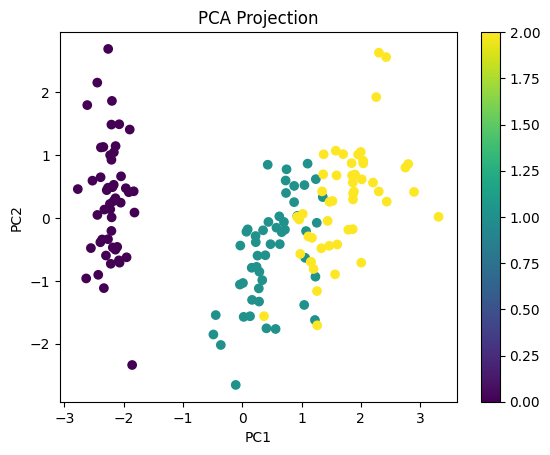

In [ ]:
#34. Train a PCA model and visualize the data projection onto the first two principal components

X_pca = PCA(n_components=2).fit_transform(X_scaled := scaler.fit_transform(iris.data))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.colorbar()
plt.show()

In [ ]:
#35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

for algo in ['kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"{algo.upper()} Accuracy:", acc)

KD_TREE Accuracy: 0.7894736842105263
BALL_TREE Accuracy: 0.7894736842105263


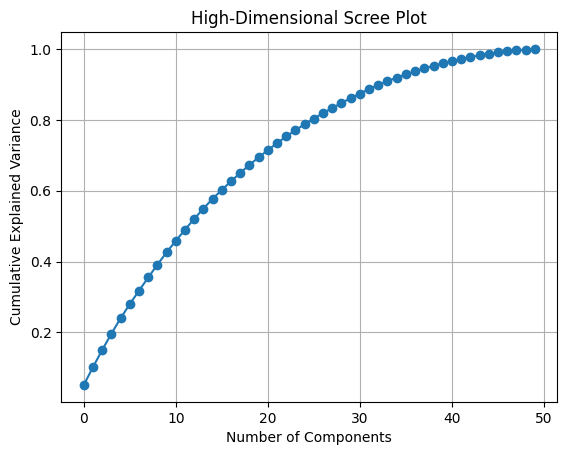

In [ ]:
#36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

X_hd, _ = make_regression(n_samples=100, n_features=50, noise=0.1)
X_hd_scaled = StandardScaler().fit_transform(X_hd)
pca_hd = PCA().fit(X_hd_scaled)

plt.plot(np.cumsum(pca_hd.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('High-Dimensional Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
#37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = knn.predict(X_test_scaled)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 0.7676767676767676
Recall: 0.7676767676767676
F1 Score: 0.7676767676767676


In [ ]:
#38. Train a PCA model and analyze the effect of different numbers of components on accuracy

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Automatically determine max possible components
max_components = min(X_train_scaled.shape[1], X_train_scaled.shape[0])  # usually just use shape[1]

for n in range(1, max_components + 1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_pca))
    print(f"Components={n}, Accuracy={acc:.2f}")


Components=1, Accuracy=0.74
Components=2, Accuracy=0.79


In [ ]:
#39. Train a KNN Classifier with different leaf_size values and compare accuracy

for leaf in [10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"Leaf Size={leaf}, Accuracy={acc:.2f}")

Leaf Size=10, Accuracy=0.79
Leaf Size=20, Accuracy=0.82
Leaf Size=30, Accuracy=0.79
Leaf Size=40, Accuracy=0.79
Leaf Size=50, Accuracy=0.79


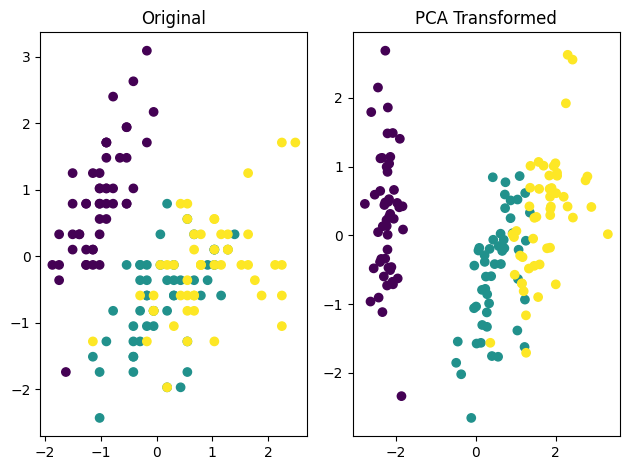

In [ ]:
#40. Train a PCA model and visualize how data points are transformed before and after PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title("PCA Transformed")

plt.tight_layout()
plt.show()

In [ ]:
#41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
#42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

for metric in ['euclidean', 'manhattan']:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, knn_reg.predict(X_test))
    print(f"{metric.capitalize()} MSE: {mse:.2f}")

Euclidean MSE: 0.29
Manhattan MSE: 0.22


In [ ]:
#43. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = knn.predict_proba(X_test_scaled)
print("ROC-AUC Score:", roc_auc_score(y_bin, y_prob, multi_class='ovr'))

ROC-AUC Score: 0.9994588744588745


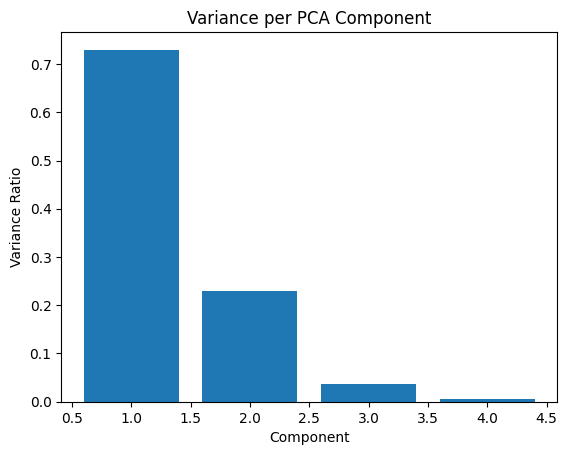

In [ ]:
#44. Train a PCA model and visualize the variance captured by each principal component

pca = PCA()
pca.fit(X_scaled)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.title("Variance per PCA Component")
plt.show()

In [ ]:
#45. Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_scaled, iris.target)

X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_new, iris.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train_fs, y_train)
print("Accuracy with Feature Selection:", accuracy_score(y_test, knn.predict(X_test_fs)))

Accuracy with Feature Selection: 1.0


In [ ]:
#46. Train a PCA model and visualize the data reconstruction error after reducing dimensions

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_reduced)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)

print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 0.041867927999983595


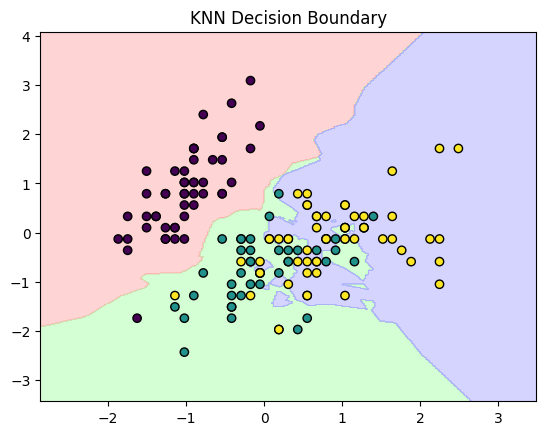

In [ ]:
#47. Train a KNN Classifier and visualize the decision boundary

from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]
y_vis = iris.target
knn = KNeighborsClassifier(n_neighbors=5).fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k')
plt.title("KNN Decision Boundary")
plt.show()

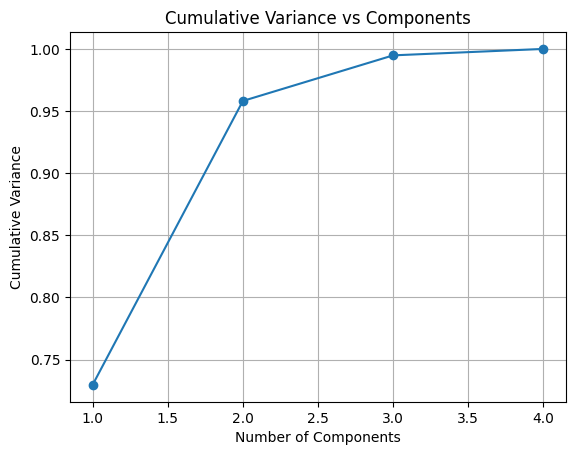

In [ ]:
#48. Train a PCA model and analyze the effect of different numbers of components on data variance

pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance vs Components")
plt.grid(True)
plt.show()